Saving data set on prices of assets.xlsx to data set on prices of assets (2).xlsx
 DATA INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3741 entries, 2010-05-31 to NaT
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   KYD Deposit Index                         3625 non-null   float64
 1   KYD Eurobond Index                        3625 non-null   float64
 2   KYD Short-Term Government Eurobond Index  3625 non-null   float64
 3   KYD Short-Term Bond Index                 3625 non-null   float64
 4   KYD Deposit Index (1 Month)               3625 non-null   float64
 5   KYD Long-Term Bond Index                  3625 non-null   float64
 6   BIST 100 Index                            3625 non-null   float64
 7   S&P 500 Total Return Index                3625 non-null   float64
 8   Gold Ounce/USD Rate                       3625 non-null   float64
 9   US

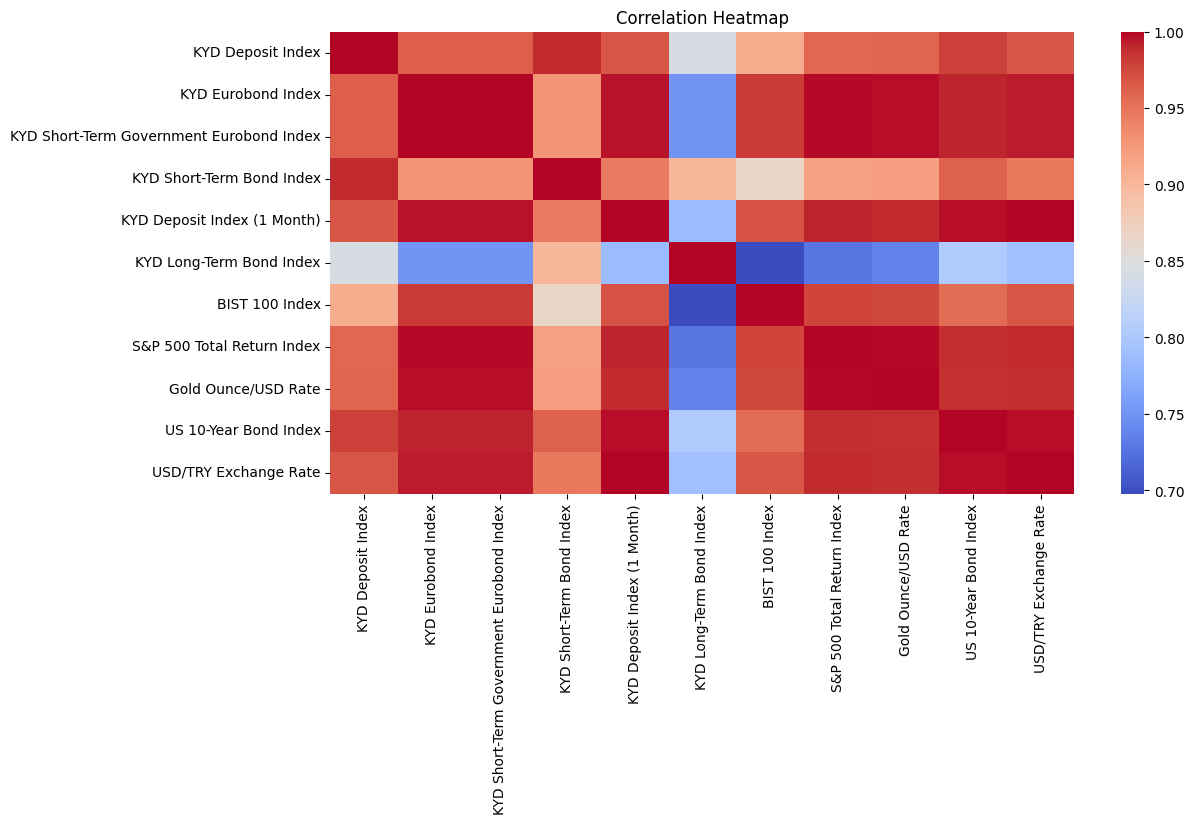

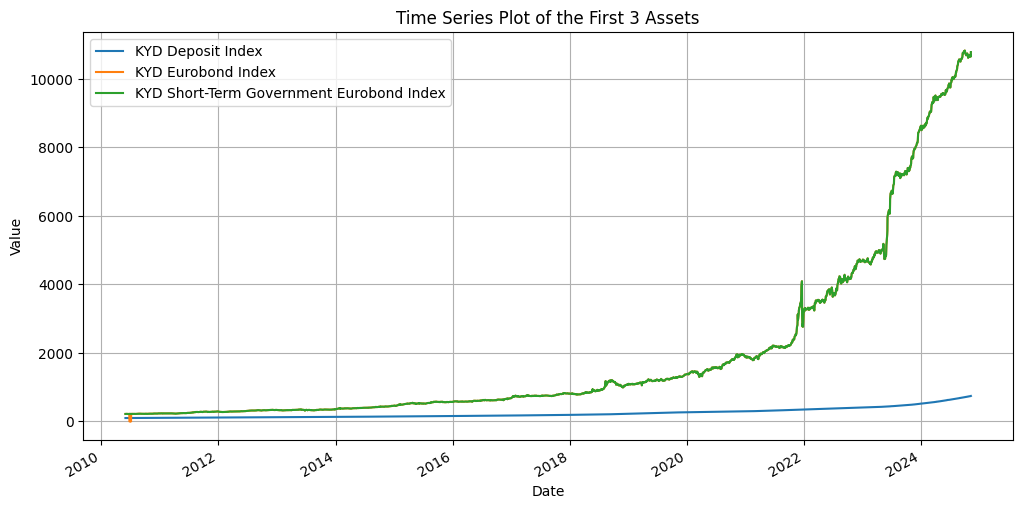


 HYPOTHESIS TEST RESULT for: KYD Deposit Index
T-statistic: 59.2044, P-value: 0.0000
 The mean daily return is statistically significantly different from zero (p < 0.05).


<ipython-input-3-dee0a48a87b7>:51: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.iloc[:, 0].pct_change().dropna()


In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import io
from google.colab import files

# 1. UPLOAD EXCEL FILE
uploaded = files.upload()
filename = next(iter(uploaded))  # Automatically fetch the uploaded filename

# 2. LOAD AND CLEAN THE DATA
df = pd.read_excel(io.BytesIO(uploaded[filename]), parse_dates=['Date'])

# Remove unnamed columns (usually empty columns in Excel)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Set 'Date' column as index and sort chronologically
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# 3. EXPLORATORY DATA ANALYSIS (EDA)
print(" DATA INFO:")
print(df.info())

print(" MISSING VALUE CHECK:")
print(df.isnull().sum())

print("DESCRIPTIVE STATISTICS:")
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Time series plot for the first 3 assets
df.iloc[:, :3].plot(figsize=(12, 6))
plt.title("Time Series Plot of the First 3 Assets")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 4. HYPOTHESIS TEST: Is the mean daily return of the first asset different from zero?

# Calculate daily returns
returns = df.iloc[:, 0].pct_change().dropna()

# One-sample t-test
t_stat, p_val = stats.ttest_1samp(returns, 0)
print(f"\n HYPOTHESIS TEST RESULT for: {df.columns[0]}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print(" The mean daily return is statistically significantly different from zero (p < 0.05).")
else:
    print(" The mean daily return is NOT statistically significantly different from zero (p ≥ 0.05).")
